In [5]:
print(len(loci),len(dup))
#'/panfs/qcb-panasas/rdagnew/HG00514/pbmm_combined/all_3/chr6:160609100-160648600/clr/kmer_filter/pre.assembly.nucfreq') as a:
#/panfs/qcb-panasas/rdagnew/HG00514/pbmm_combined/all_3/DUP_call.queries.counts.ALL


1174692 62745


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
loci={}
dup={}
counts={}
multi={}
with open('/panfs/qcb-panasas/rdagnew/HG00514/pbmm_combined/all_3/DUP_call.queries.counts.ALL') as a:
#with open('/panfs/qcb-panasas/rdagnew/HG00514/pbmm_combined/all_3/chr6:160609100-160648600/clr/kmer_filter/pre.assembly.nucfreq') as a:
    for line in a.readlines():
        line=line.rstrip()
        line=line.split()
        #idx=",".join(line[3:5])
        idx=line[3]
        if idx in loci:
            if idx in dup:
                dup[idx].append("\t".join(line[:3]))
                multi[idx]=multi[idx]+1
            else:
                dup[idx]=[]
                dup[idx].append("\t".join(line[:3]))
                multi[idx]=multi[idx]+1
        else:
            loci[idx]=line[:3]
            counts[idx]=line[5:]
            multi[idx]=1

In [3]:
print(len(loci),len(dup))

1174560 62825


In [4]:
hg_ct={}
il_ct={}
ccs_ct={}
means=[[],[],[],[]]
medians=[[],[],[],[]]
ct_list=[]
def calc(ct,start,end):
    for key in counts.keys():
        #ct[key]={}
        ct_list=counts[key]
        for k,strr in enumerate(ct_list[start:end]):
            strr=np.array(strr.split(","),dtype=int)
            #print(k,strr)
            means[k].append(np.mean(strr))
            medians[k].append(np.median(strr))
        #ct[key]['mean']=means
        #ct[key]['median']=medians
    return means,medians


In [54]:
allele={0:'ref',1:'alt',2:'alt2',3:'alt3'}
qs=['hg','il','ccs']

def ct_loop(ct,ct_med,query,xlimm):
    for i in range(4):
        plot_ct(ct,ct_med,i,query,xlimm)
        
def plot_ct(ct,ct_med,i,query,xlimm):
    al=allele[i]    
    fig = plt.figure(figsize=(30,8))
    ax = fig.add_subplot(111)
    max_ =  int(np.max(ct[i]))
    max_m = int(np.max(ct_med[i]) )
    #print(max_,max_m)
    lims =  min( max_ , max_m )
    x=range(lims)
    ax.plot(x,x,c='red')
    ax.scatter(ct[i],ct_med[i],s=1.5)
    ax.set_title(" ".join([al,"query", query]))
    ax.set_xlabel("mean")
    ax.set_ylabel("median")
    ax.set_xlim(0,xlimm)
    ax.set_ylim(0,xlimm)

In [43]:
def hist_loop(ct,ct_med,query,minn,maxx,tf,binsize):
    for i in range(4):
        plot_hist(ct,ct_med,i,query,minn,maxx,tf,binsize)
#        plot_hist(ct_med,i,query,minn,maxx,'median',tf,binsize)


def plot_hist(ct,ct_med,i,query,minn,maxx,tf,binsize):
    al=allele[i]    
    fig = plt.figure(figsize=(30,10))
    ax = fig.add_subplot(121)
    ax.hist(ct[i],bins=range(minn,maxx,binsize),cumulative=tf,edgecolor='red',linewidth=0.3)
    ax.set_title(" ".join([al,"query", query,": mean"]))
    
    
    ax = fig.add_subplot(122)
    ax.hist(ct_med[i],bins=range(minn,maxx,binsize),cumulative=tf,edgecolor='red',linewidth=0.3)
    ax.set_title(" ".join([al,"query", query,": median"]))
    
    
    
    
#    ax.set_xlim(0,10000)

In [7]:
hg_m,hg_med = calc(hg_ct,1,5)

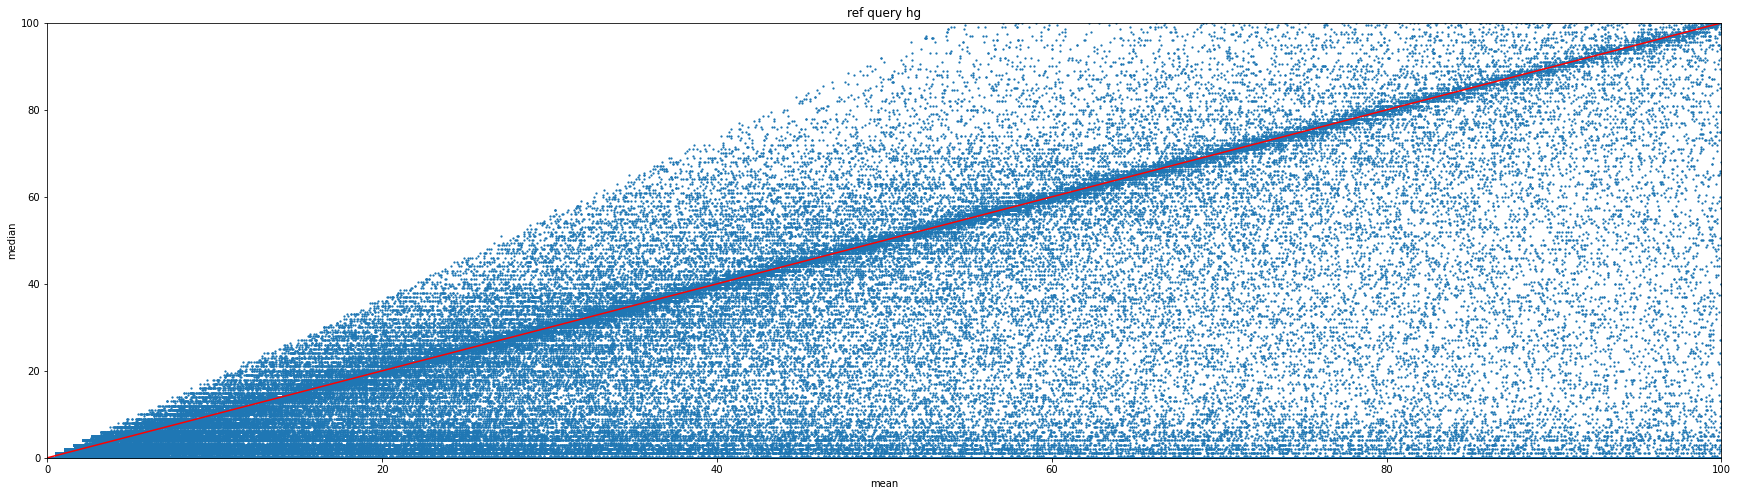

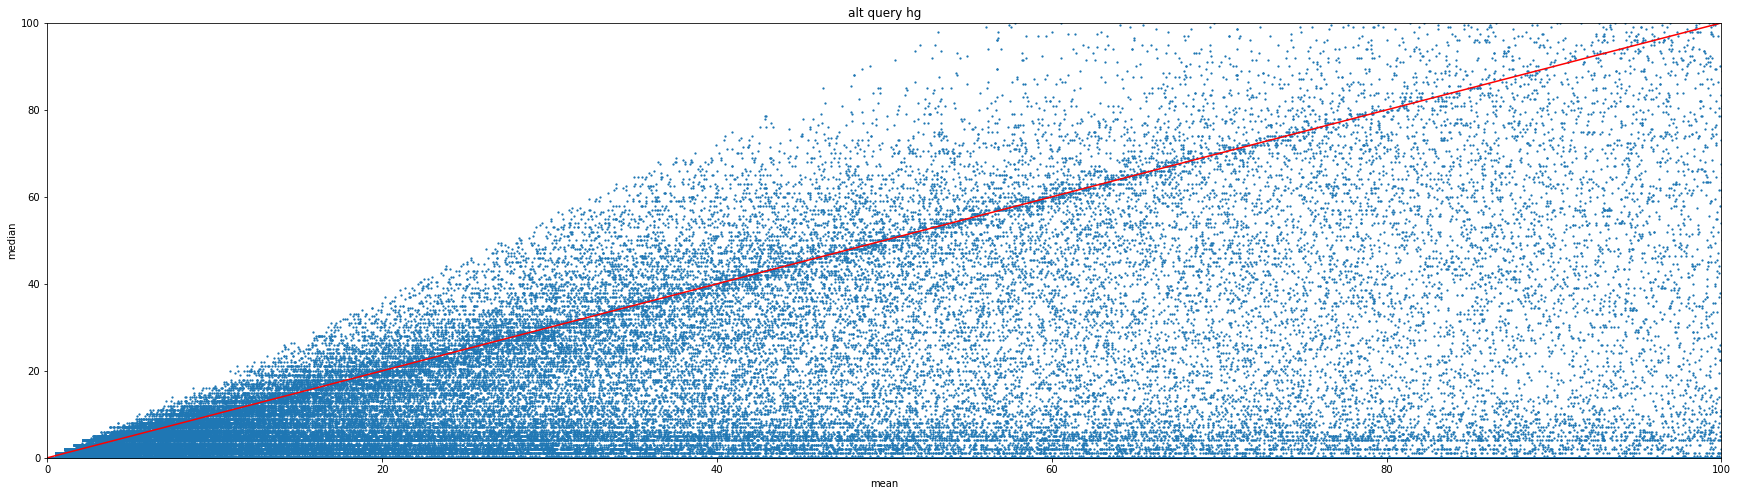

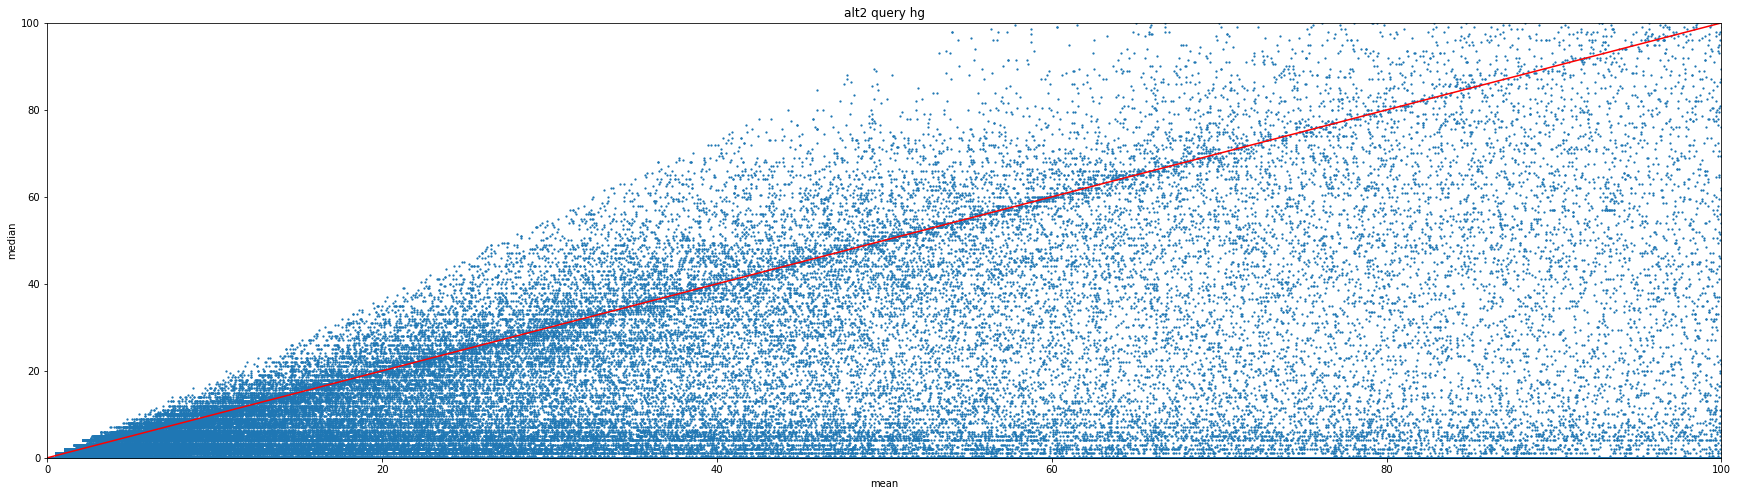

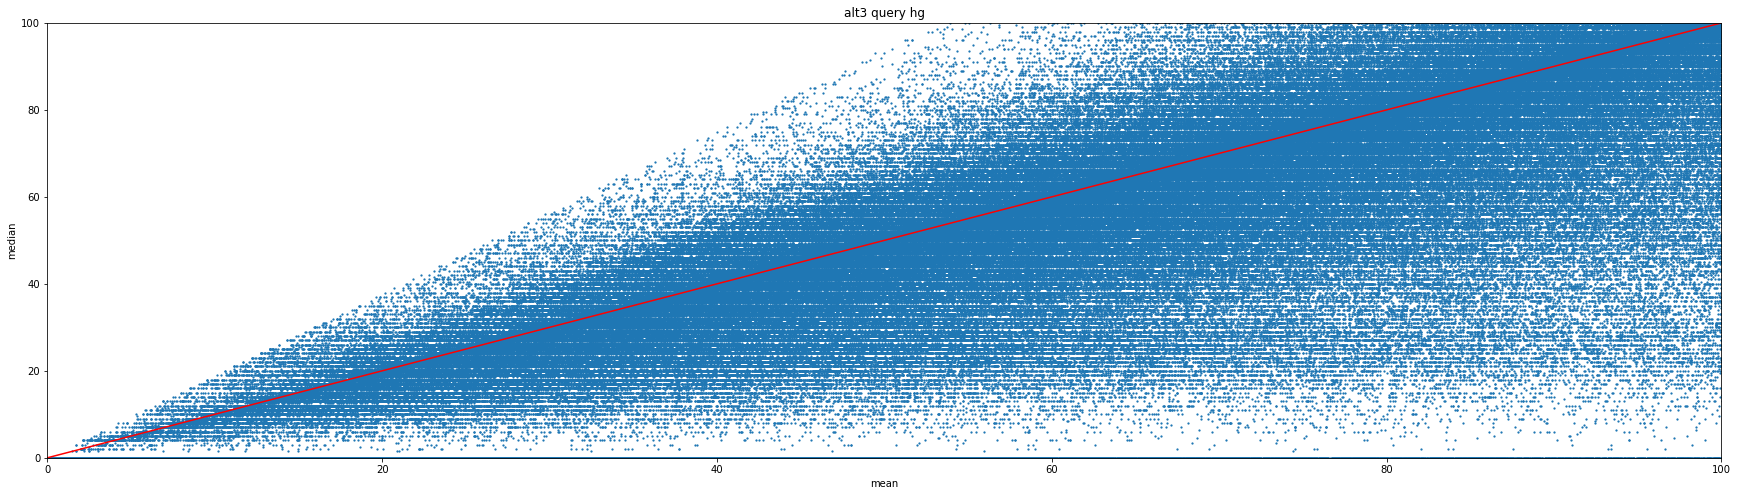

In [55]:
ct_loop(hg_m,hg_med,'hg',100)


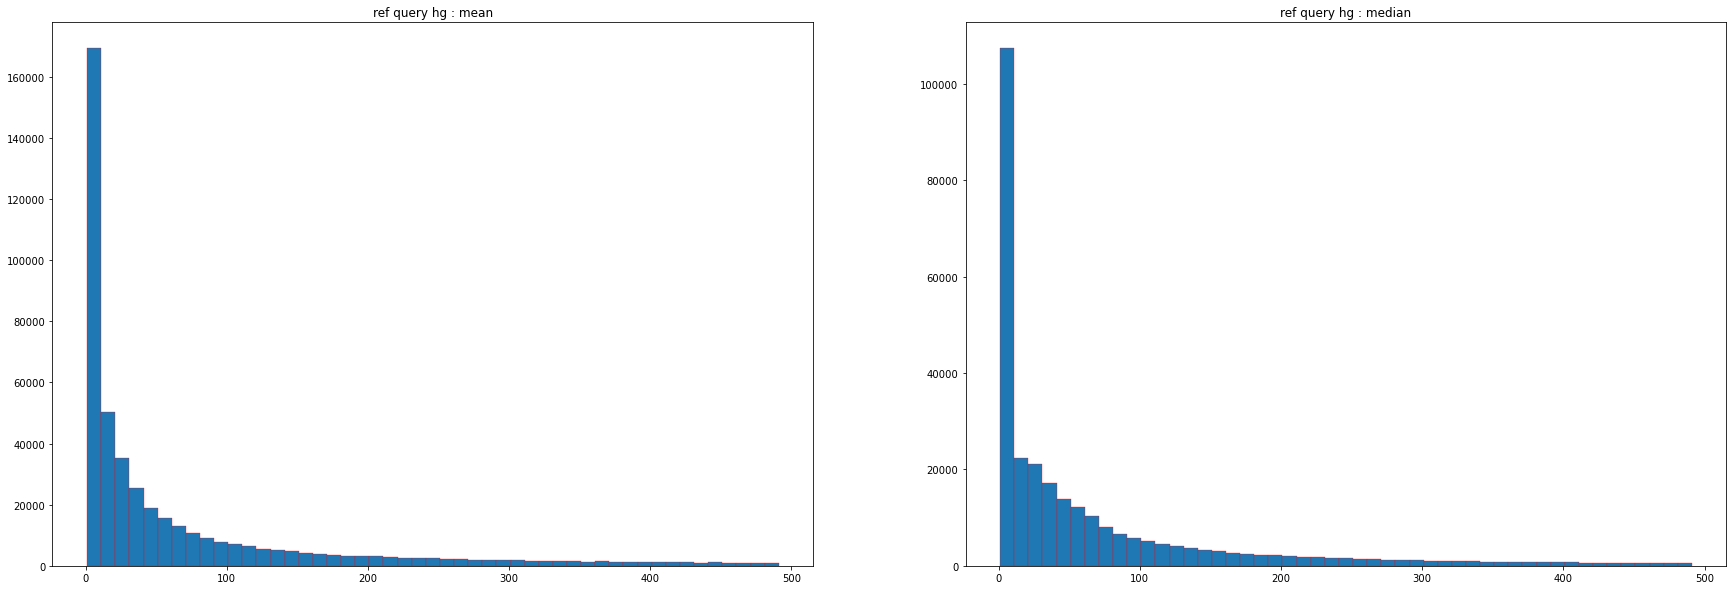

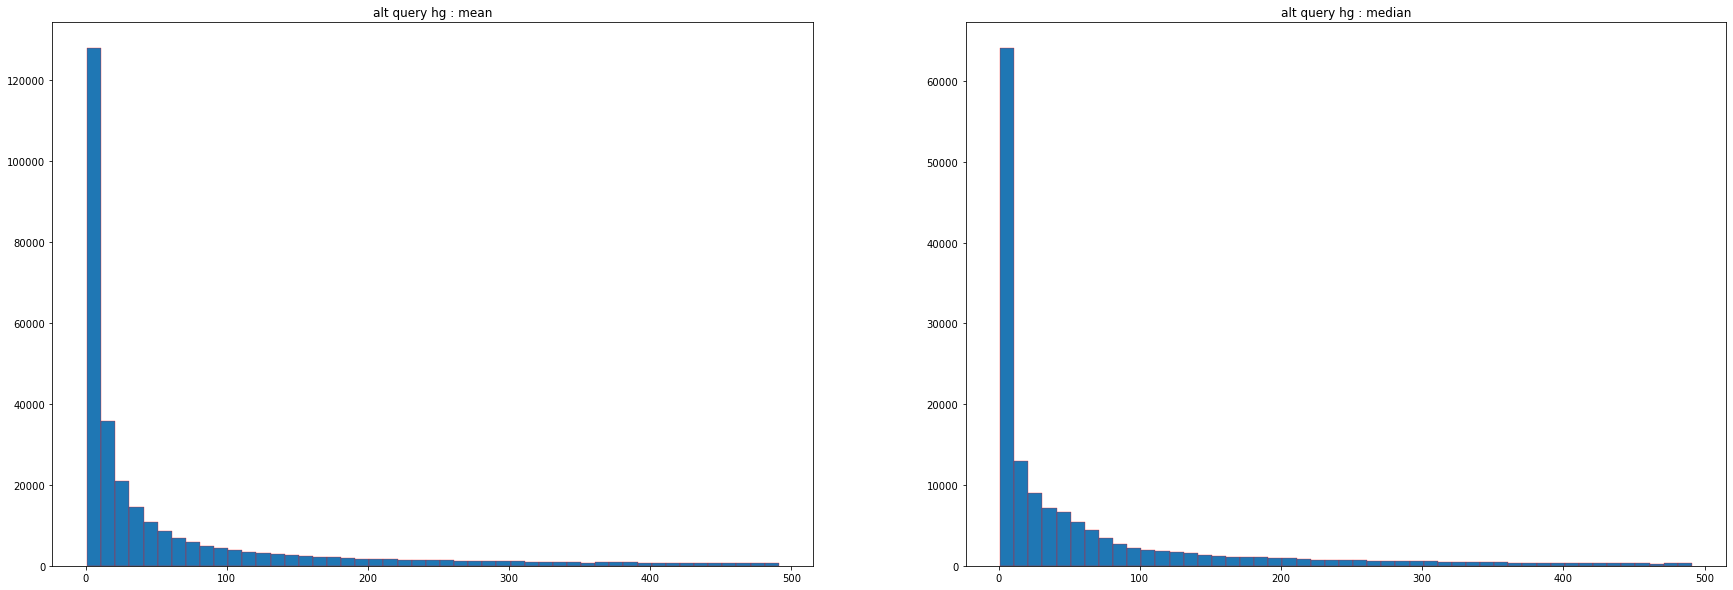

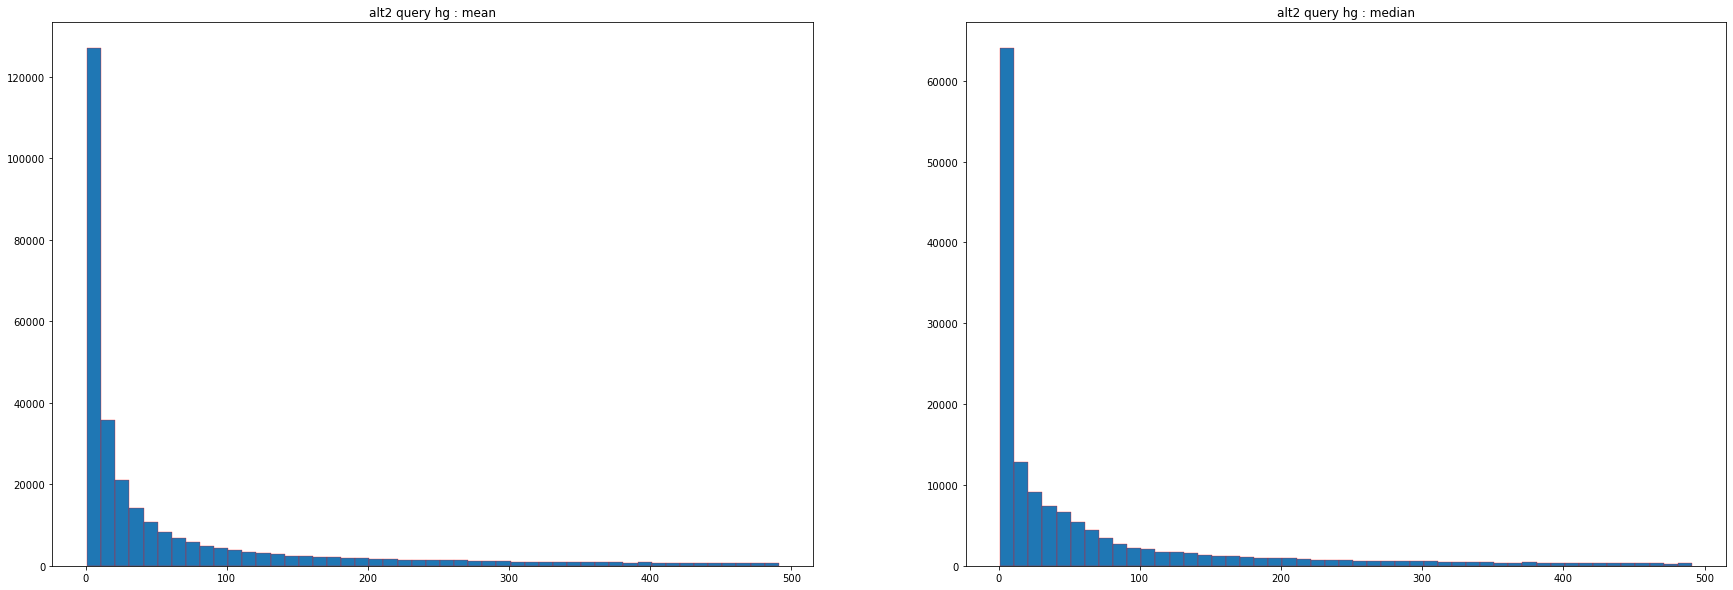

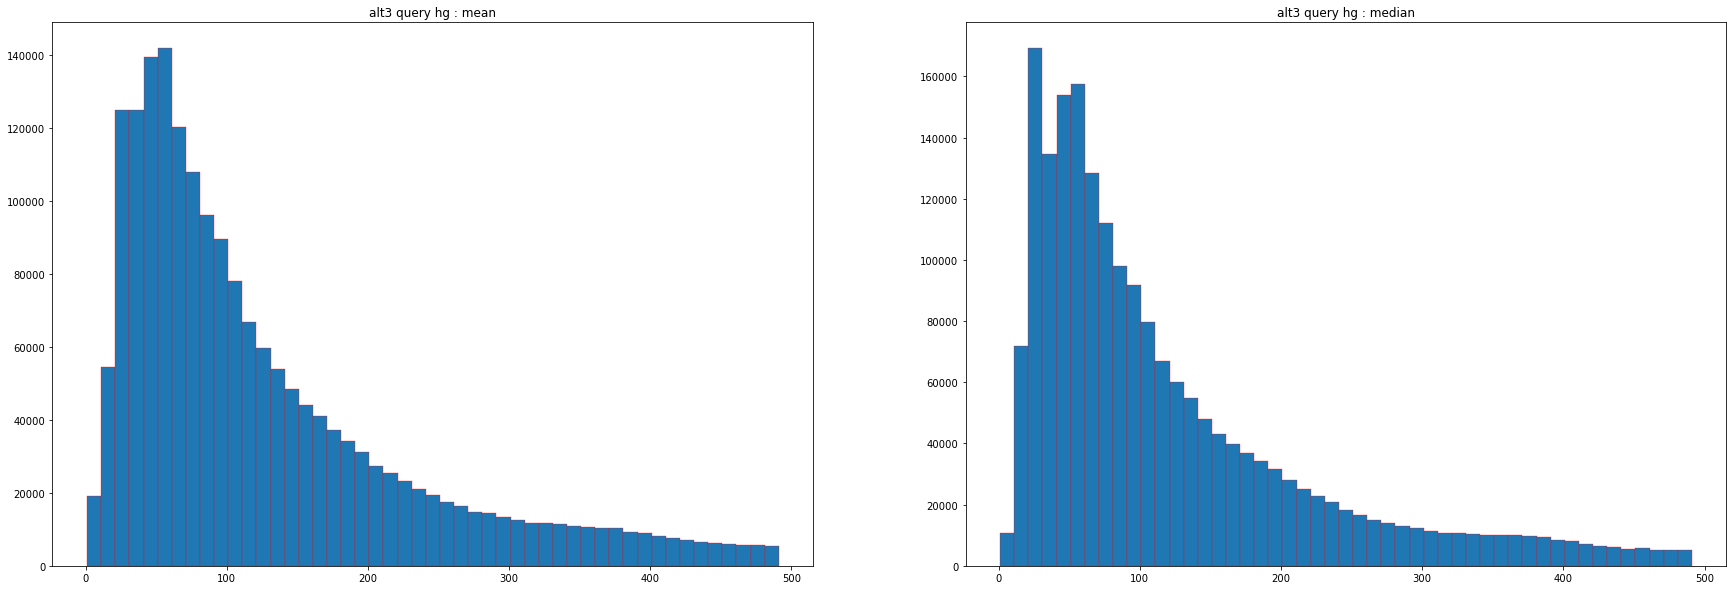

In [44]:
hist_loop(hg_m,hg_med,'hg',1,500,False,10)

In [11]:
il_m,il_med=calc(il_ct,5,9)

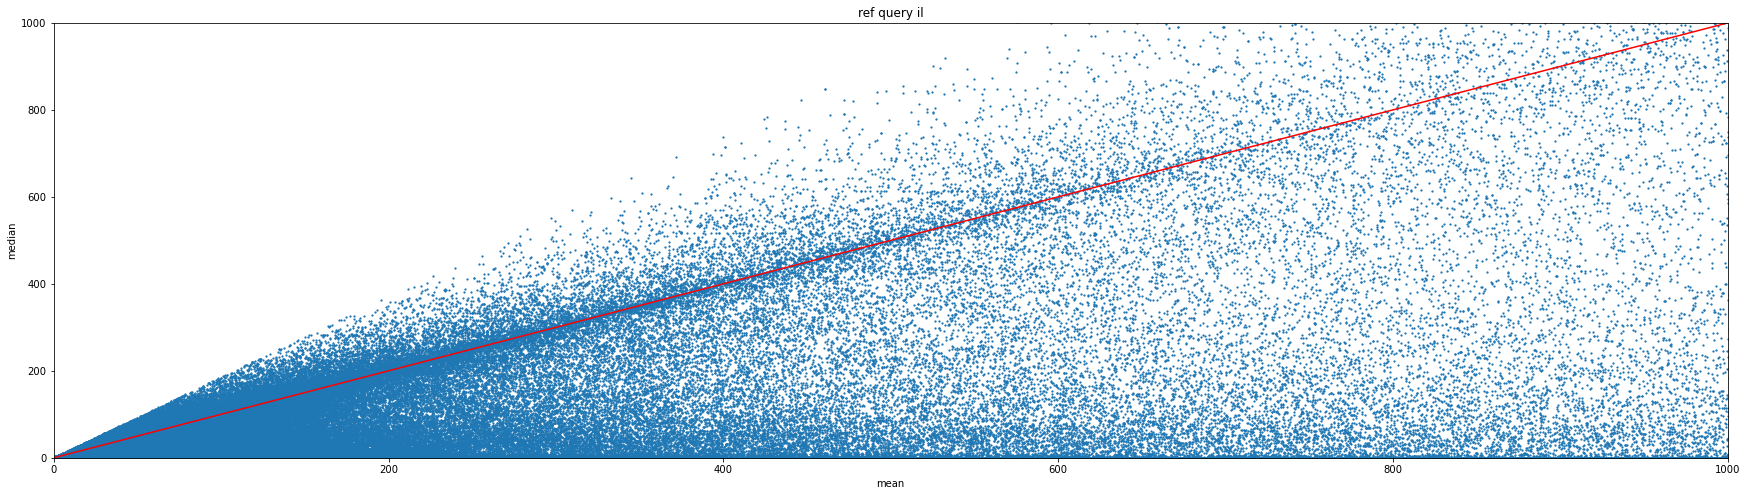

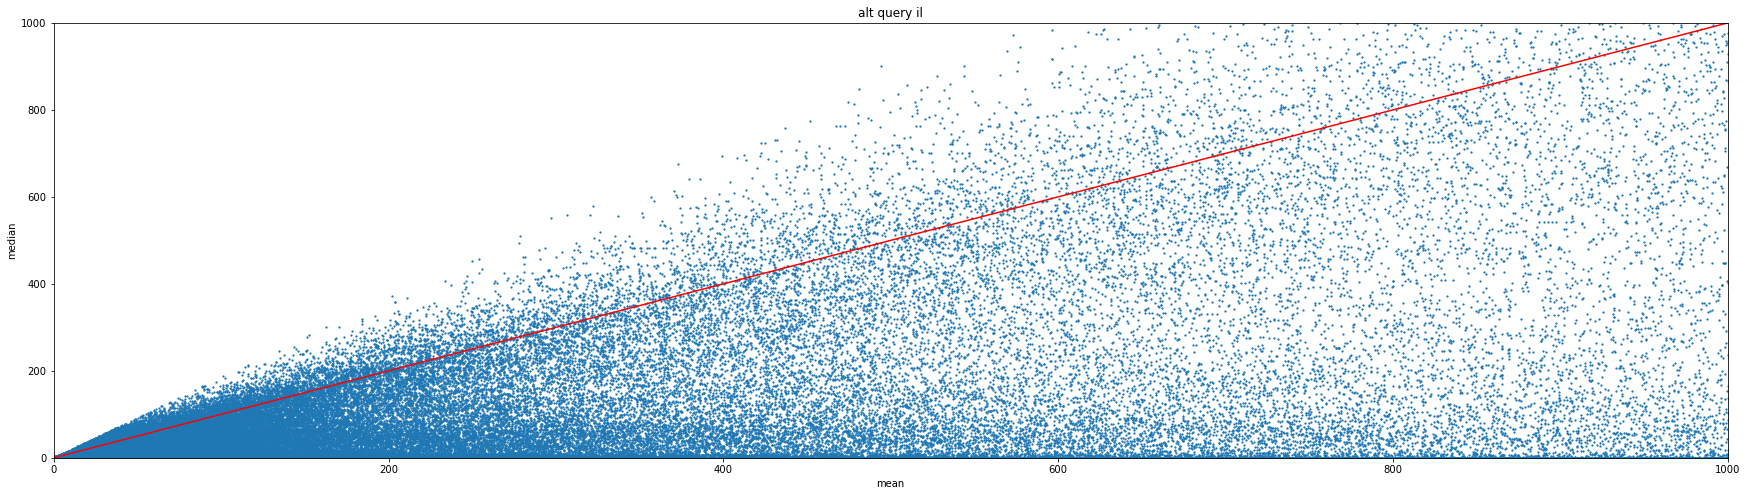

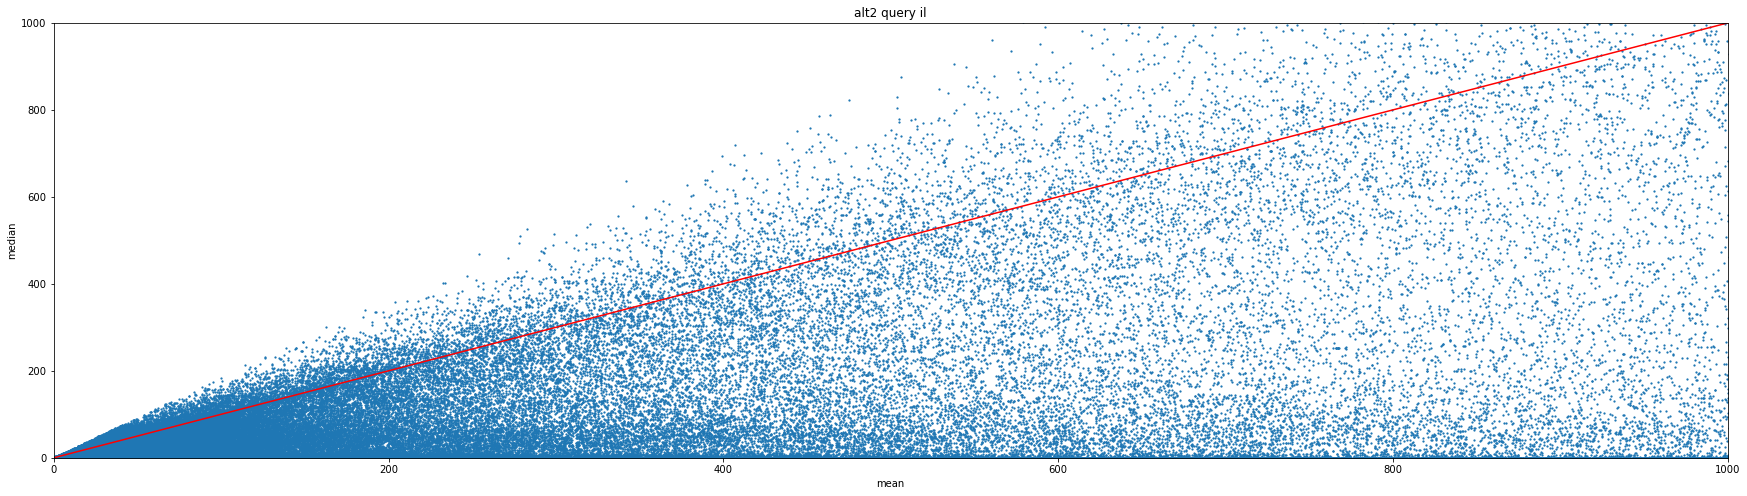

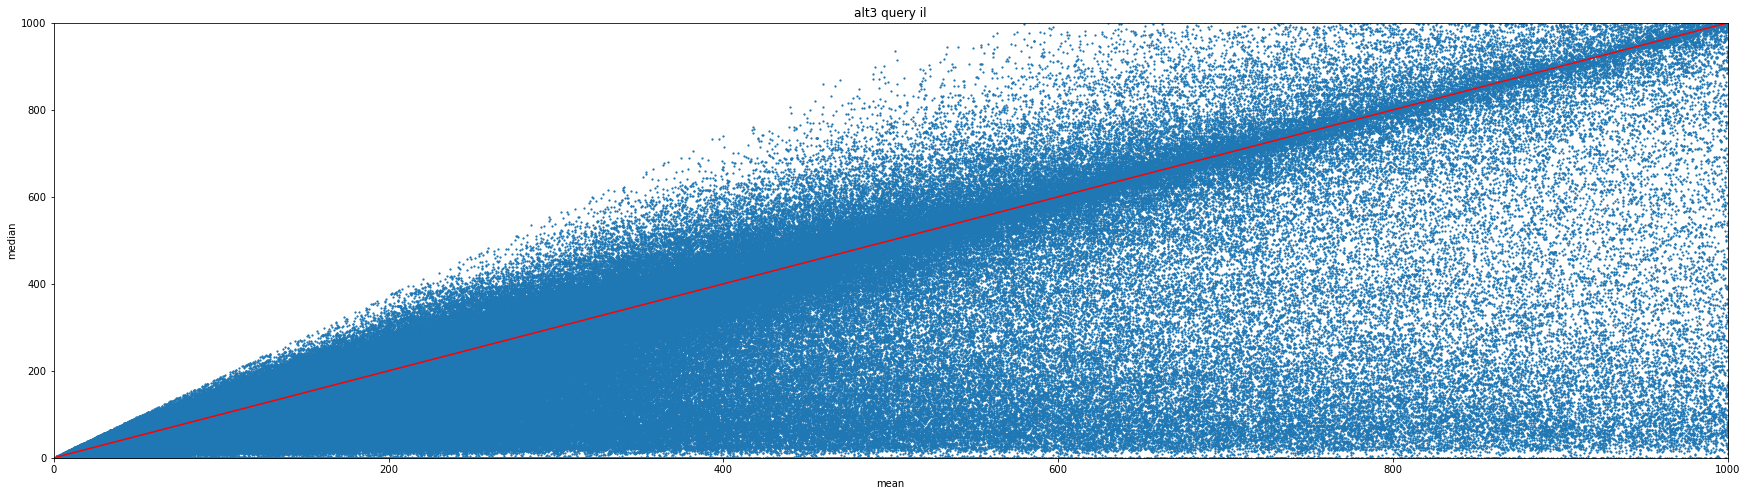

In [56]:
ct_loop(il_m,il_med,'il',1000)

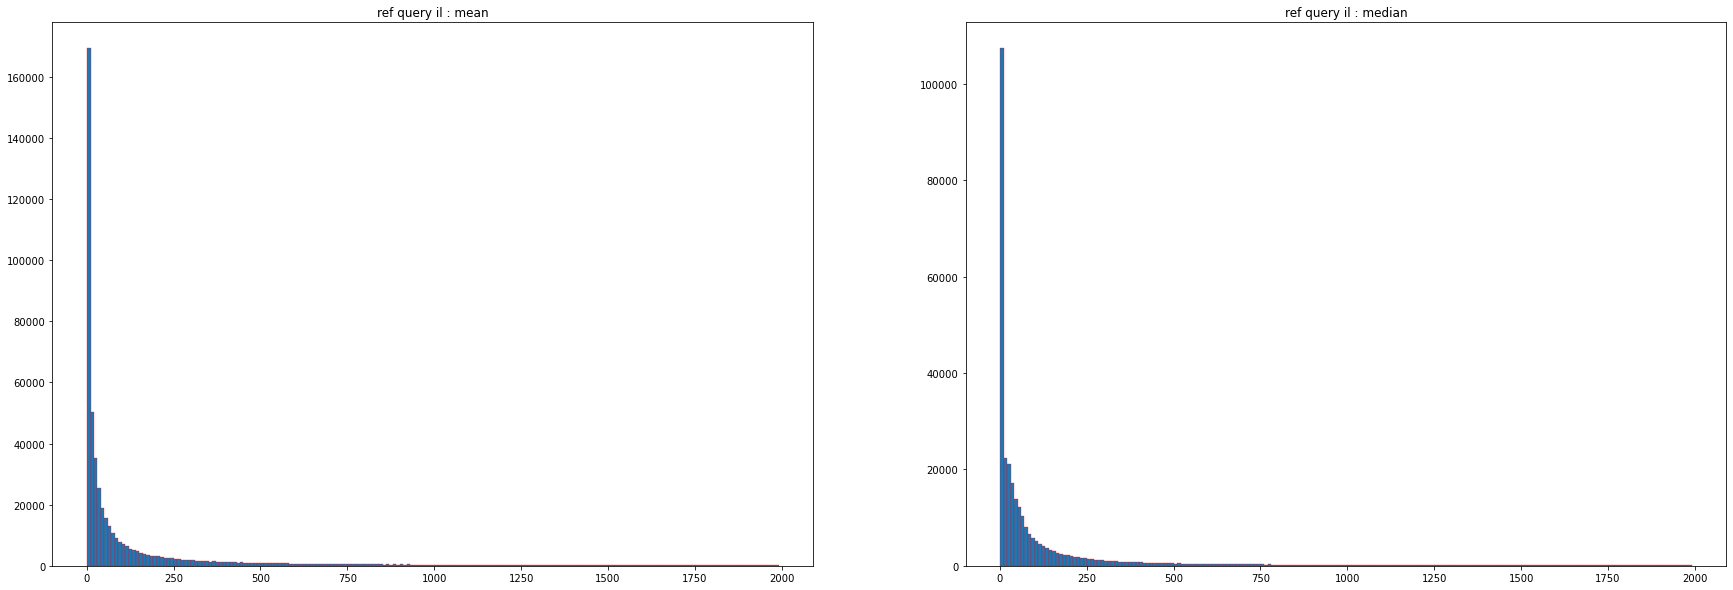

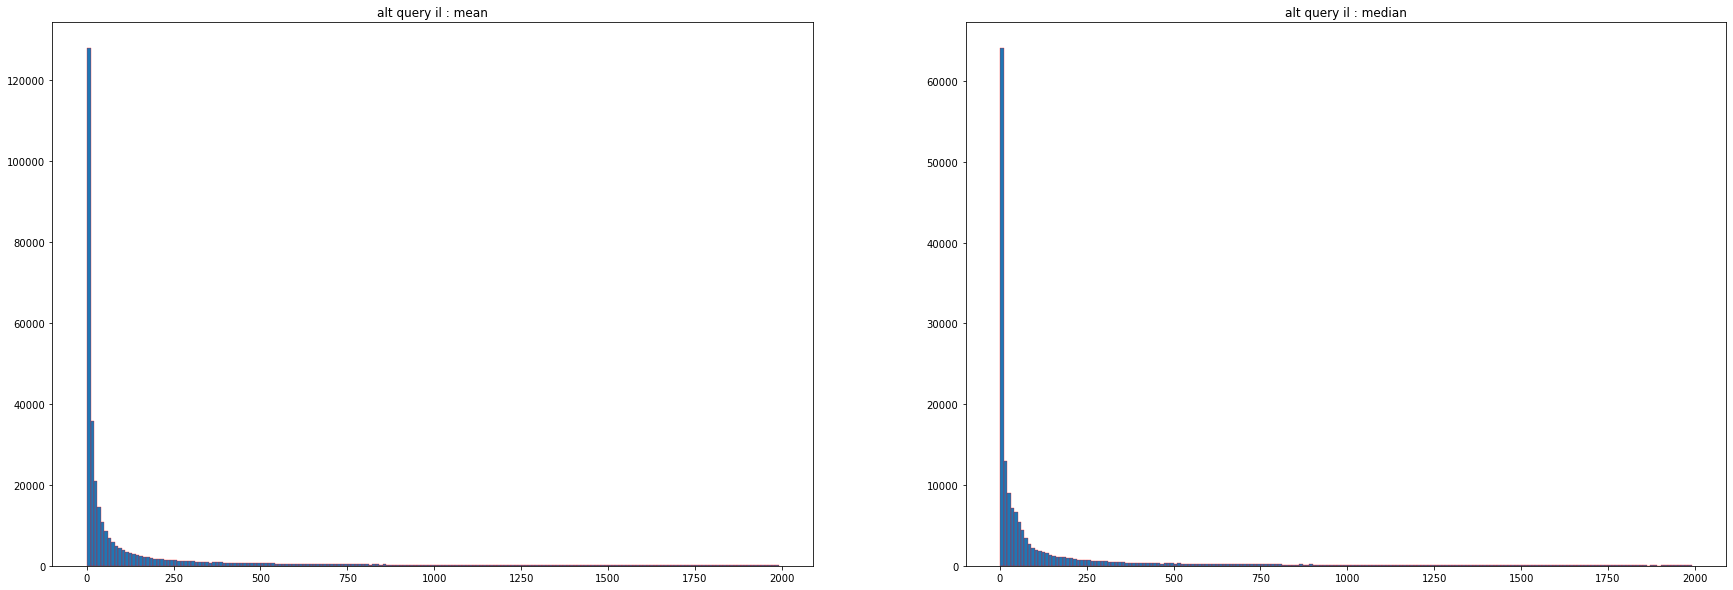

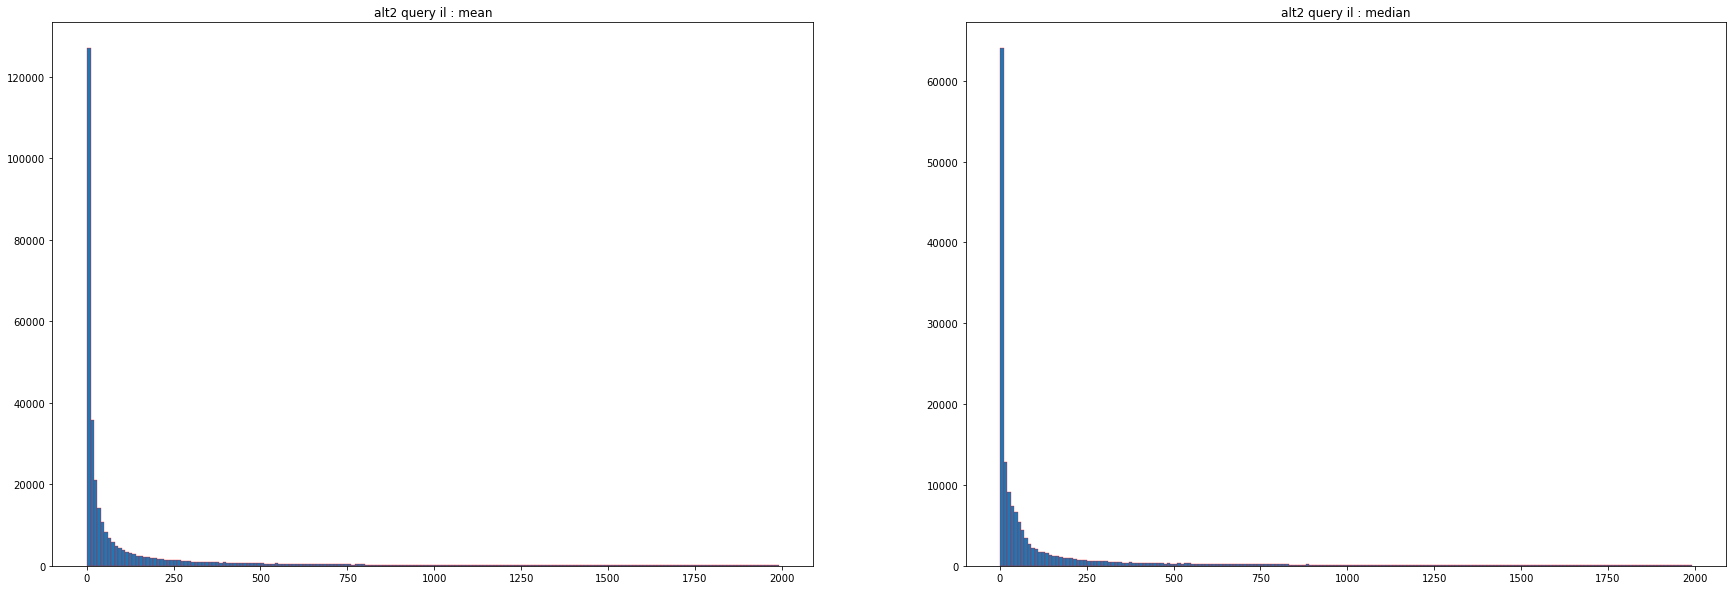

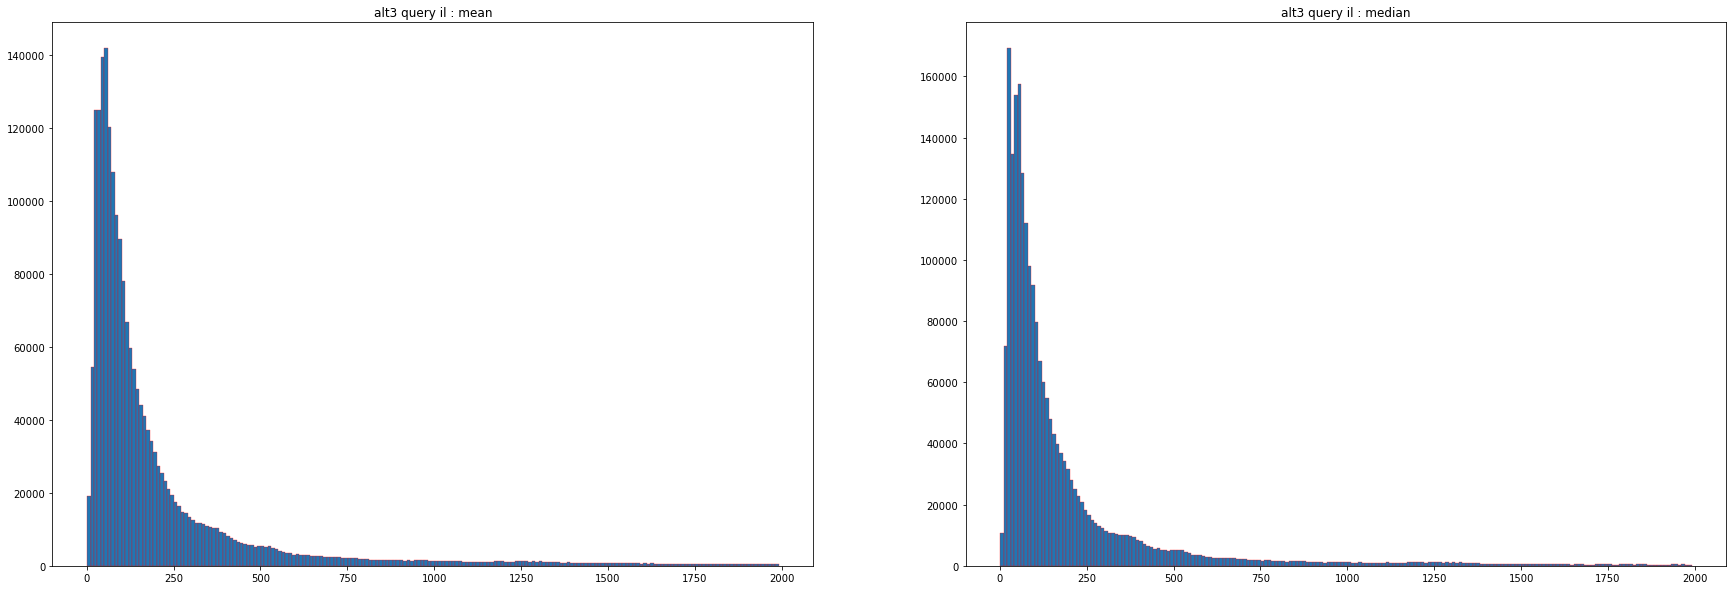

In [45]:
hist_loop(il_m,il_med,'il',1,2000,False,10)
#hist_loop(hg_m,hg_med,'hg',1,500,False,10)